# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    

**Bike Sharing Dataset**

**Features**:

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from [Web Link])
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users

**Target Variable**:

- `cnt`: count of total rental bikes including both casual and registered

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the count of total rental bikes including both casual and registered.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bike_sharing')

In [5]:
# Fetching in teradata dataframe
bike_df = DataFrame("bike_sharing")

In [6]:
# first 5 rows
bike_df.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
8,08-01-2011,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
4,04-01-2011,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [7]:
# bike_df dataset
bike_df.shape

(731, 16)

In [8]:
bike_df.info()

<class 'teradataml.dataframe.dataframe.DataFrame'>
Data columns (total 16 columns):
instant                 int
dteday        datetime.date
season                  int
yr                      int
mnth                    int
holiday                 int
weekday                 int
workingday              int
weathersit              int
temp                  float
atemp                 float
hum                   float
windspeed             float
casual                  int
registered              int
cnt                     int
dtypes: int(11), datetime.date(1), float(4)


In [9]:
# Performing sampling to get 80% for trainning and 20% for testing
bike_df_sample = bike_df.sample(frac = [0.8, 0.2])

In [10]:
bike_df_sample.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sampleid
3,11/01/03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
5,11/01/05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600,1
6,11/01/06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,1
7,11/01/07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,1
9,11/01/09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822,1
10,11/01/10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,1
8,11/01/08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959,1
4,11/01/04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562,1
2,11/01/02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
1,11/01/01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1


In [11]:
# Fetching train and test data
bike_df_train= bike_df_sample[bike_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bike_df_test = bike_df_sample[bike_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
bike_df_train.shape

(585, 16)

In [13]:
# test data shape
bike_df_test.shape

(146, 16)

In [14]:
#train dataset
bike_df_train.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,11/01/03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
5,11/01/05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,11/01/06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,11/01/07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
9,11/01/09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,11/01/10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
8,11/01/08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
4,11/01/04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
2,11/01/02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
1,11/01/01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [15]:
# test dataset
bike_df_test.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
43,11/02/12,1,0,2,0,6,0,1,0.2225,0.232954,0.544167,0.203367,288,1184,1472
49,11/02/18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927
55,11/02/24,1,0,2,0,4,1,2,0.295652,0.289191,0.697391,0.250496,100,1707,1807
57,11/02/26,1,0,2,0,6,0,1,0.2825,0.282192,0.537917,0.186571,424,1545,1969
60,11/03/01,1,0,3,0,2,1,1,0.266667,0.263879,0.535,0.216425,137,1714,1851
61,11/03/02,1,0,3,0,3,1,1,0.335,0.320071,0.449583,0.307833,231,1903,2134
59,11/02/28,1,0,2,0,1,1,2,0.407273,0.400118,0.876364,0.289686,81,1365,1446
48,11/02/17,1,0,2,0,4,1,1,0.435833,0.428658,0.505,0.230104,259,2216,2475
42,11/02/11,1,0,2,0,5,1,1,0.189091,0.213509,0.506364,0.10855,149,1597,1746
36,11/02/05,1,0,2,0,6,0,2,0.233333,0.243058,0.929167,0.161079,100,905,1005


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [17]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 400 sec
# and verbose level 2 for detailed loggging

aml = AutoML(max_runtime_secs=400, 
             verbose=2)


Task type is set to Regression as target column is having distinct values greater than 20.


Feature Exploration started ...

Data Overview:
Total Rows in the data: 585
Total Columns in the data: 16
Identified Date Columns:


['dteday']


Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
weathersit,BIGINT,585,0,None,0,585,0,0.0,100.0
instant,BIGINT,585,0,None,0,585,0,0.0,100.0
windspeed,FLOAT,585,0,None,0,585,0,0.0,100.0
season,BIGINT,585,0,None,0,585,0,0.0,100.0
weekday,BIGINT,585,0,None,91,494,0,0.0,100.0
cnt,BIGINT,585,0,None,0,585,0,0.0,100.0
holiday,BIGINT,585,0,None,570,15,0,0.0,100.0
mnth,BIGINT,585,0,None,0,585,0,0.0,100.0
registered,BIGINT,585,0,None,0,585,0,0.0,100.0
workingday,BIGINT,585,0,None,189,396,0,0.0,100.0



Statistics of Data:


func,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
std,210.045,1.104,0.5,3.44,0.158,2.016,0.468,0.552,0.185,0.164,0.144,0.077,678.887,1586.864,1951.64
25%,182,2,0,4,0,1,0,1,0.343,0.339,0.519,0.134,316,2507,3194
50%,352,3,0,7,0,3,1,1,0.513,0.499,0.631,0.178,729,3643,4521
75%,543,3,1,9,0,5,1,2,0.659,0.612,0.729,0.233,1120,4721,5936
max,730,4,1,12,1,6,1,3,0.862,0.841,0.973,0.507,3410,6946,8395
min,1,1,0,1,0,0,0,1,0.059,0.079,0,0.022,2,20,22
mean,360.282,2.516,0.484,6.535,0.026,2.945,0.677,1.397,0.5,0.478,0.627,0.19,849.178,3641.583,4490.761
count,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585



Target Column Distribution:


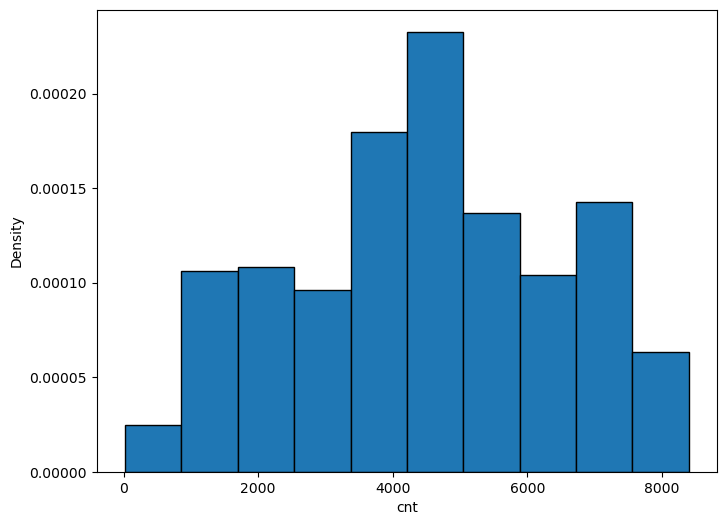

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        hum           0.341880
1     casual           5.128205
2    holiday           2.564103
3  windspeed           2.051282


Analysis complete. No action taken.                                                     


['dteday']


['dteday']
No useful date feature found                                                             


No Missing Values Detected.                                                              


No imputation is Required.                                                               


Encoding not required.                                                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,id
265,3,0,9,0,4,1,2,0.628333,0.554963,0.902083,0.128125,555,4240,4795,9
122,2,0,5,0,1,1,2,0.549167,0.532833,0.73,0.183454,847,3554,4401,11
591,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883,19
488,2,1,5,0,3,1,1,0.564167,0.537896,0.797083,0.138058,667,5502,6169,14
326,4,0,11,0,2,1,3,0.416667,0.421696,0.9625,0.118792,69,1538,1607,13
305,4,0,11,0,2,1,1,0.400833,0.397088,0.68375,0.135571,410,3658,4068,21
40,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605,10
631,3,1,9,0,6,0,1,0.65,0.610488,0.646667,0.283583,2512,5883,8395,18
162,2,0,6,0,6,0,1,0.725,0.678038,0.654583,0.15485,1729,3237,4966,15
427,1,1,3,0,5,1,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194,23


instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,id
364,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999,24
120,2,0,4,0,6,0,1,0.4725,0.464021,0.503333,0.235075,1965,3347,5312,26
110,2,0,4,0,3,1,1,0.595,0.564392,0.614167,0.241925,613,3331,3944,122
387,1,1,1,0,0,0,2,0.1625,0.16225,0.79625,0.199638,196,1781,1977,27
242,3,0,8,0,2,1,1,0.639167,0.594704,0.548333,0.125008,775,4429,5204,28
135,2,0,5,0,0,0,2,0.5625,0.536,0.867083,0.152979,1582,2971,4553,124
385,1,1,1,0,5,1,2,0.2175,0.220958,0.45,0.20275,115,3048,3163,29
360,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317,125
610,3,1,9,0,6,0,2,0.753333,0.702654,0.638333,0.113187,2352,3788,6140,30
295,4,0,10,0,6,0,1,0.4225,0.425492,0.629167,0.0926667,1499,2809,4308,126


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        hum           0.341880
1    holiday           2.564103
2     casual           5.128205
3  windspeed           2.051282


['holiday', 'casual', 'windspeed', 'hum']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171231977688088"'19


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171236232121127"'19
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171237666966119"'


['instant', 'registered', 'casual']


['instant', 'registered', 'casual']


cnt,id,instant,registered,casual
1605,10,-1.4382099202055876,-1.305347461845796,-1.3226613192778696
2077,12,-1.250587288345726,-1.228255850539375,-0.6468935426149154
1607,13,-0.09670810240757724,-1.3140513534449083,-1.2915915364427912
6169,14,0.6631635566248621,1.150393382189395,-0.1303584029817377
5260,16,0.7616654383512895,0.5237131870533259,0.06188587831030961
3348,17,-1.1520854066192987,-0.7203216050769063,0.23471154533043295
4966,15,-0.8659608930330097,-0.25777193723837916,1.931898432696588
4401,11,-1.0535835248928713,-0.060690963172770174,0.2191766539128938
4795,9,-0.38283261599386614,0.3657997251837212,-0.3478468828272862
5119,8,-0.7674590113065825,-0.4579614440179568,2.8542826106129766


cnt,id,instant,registered,casual
5312,26,-1.0629646564858644,-0.18938421753107007,2.3901777295139937
5204,28,-0.49071562931328655,0.4833022617717342,0.07936263115504119
3163,29,0.1800352795857186,-0.3752744738263921,-1.202265910791941
6140,30,1.2354125837974401,0.08478836784096014,3.1416781018374516
7175,120,1.0993861756990404,1.3648821394532282,1.1532120003924369
5026,121,0.635020161845883,0.559150459992568,-0.5031957970026779
4792,31,-0.5798363794467208,0.20415602405735422,0.15121150396115987
1977,27,0.18941641117871166,-1.1629766635460344,-1.0449751351893568
4563,25,-0.2937118658604319,0.15193267446268183,-0.1303584029817377
2999,24,0.08153339785929127,-0.7109960069350005,-0.4721260141675996


['registered', 'casual']


['r_registered', 'r_casual']


cnt,id,r_registered,r_casual
1605,10,-1.305347461845796,-1.3226613192778696
2077,12,-1.228255850539375,-0.6468935426149154
1607,13,-1.3140513534449083,-1.2915915364427912
6169,14,1.150393382189395,-0.1303584029817377
5260,16,0.5237131870533259,0.06188587831030961
3348,17,-0.7203216050769063,0.23471154533043295
4966,15,-0.25777193723837916,1.931898432696588
4401,11,-0.060690963172770174,0.2191766539128938
4795,9,0.3657997251837212,-0.3478468828272862
5119,8,-0.4579614440179568,2.8542826106129766


cnt,id,r_registered,r_casual
5312,26,-0.18938421753107007,2.3901777295139937
5204,28,0.4833022617717342,0.07936263115504119
3163,29,-0.3752744738263921,-1.202265910791941
6140,30,0.08478836784096014,3.1416781018374516
7175,120,1.3648821394532282,1.1532120003924369
5026,121,0.559150459992568,-0.5031957970026779
4792,31,0.20415602405735422,0.15121150396115987
1977,27,-1.1629766635460344,-1.0449751351893568
4563,25,0.15193267446268183,-0.1303584029817377
2999,24,-0.7109960069350005,-0.4721260141675996


['instant', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


cnt,id,holiday,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
4795,9,0,-0.38283261599386603,0.4205517276206999,-0.8939492710133495,0.7050408912476093,0.537372096141155,0.5691215784603345,1.008053357391983,0.6851471041029332,0.4687233604253596,1.903124798068043,-0.8005127093399909,-0.3478468828272861,0.3657997251837211
4401,11,0,-1.0535835248928709,-0.4874086689347599,-0.8939492710133495,-0.45668989237369617,-1.0446814176730144,0.5691215784603345,1.008053357391983,0.26589481165417544,0.33635164545608415,0.6782641311744769,-0.022146937815474572,0.21917665391289373,-0.060690963172770146
6883,19,0,1.1462918336640053,0.4205517276206999,1.1186317081129618,0.4146081953422829,-1.0446814176730144,0.5691215784603345,-0.7456262436907646,1.1750144341626814,1.110489906777305,-0.635569637862645,-0.6867451734308153,0.9182467677021565,1.2585703206355017
5119,8,0,-0.7674590113065821,0.4205517276206999,-0.8939492710133495,0.12417549943695654,1.5920744386839345,-1.7570938053435567,-0.7456262436907646,1.2676920371469584,1.1407206635533882,-1.3532907403861127,-0.9842823793760432,2.854282610612976,-0.4579614440179566
6169,14,0,0.6631635566248619,-0.4874086689347599,1.1186317081129618,-0.45668989237369617,0.01002092486976516,0.5691215784603345,-0.7456262436907646,0.34533275706926986,0.36663623618764524,1.1557507400621714,-0.660775732193232,-0.13035840298173768,1.1503933821893946
5805,22,0,-0.9644627747594366,-0.4874086689347599,-0.8939492710133495,-0.45668989237369617,1.5920744386839345,-1.7570938053435567,-0.7456262436907646,0.5483390745090577,0.5704814993795991,-0.0572444739295303,-0.9056706580133042,2.9591431276813656,-0.06504290897232617
4966,15,0,-0.8659608930330094,-0.4874086689347599,-0.8939492710133495,-0.1662571964683698,1.5920744386839345,-1.7570938053435567,-0.7456262436907646,1.1970822953989948,1.2049027015841305,0.1414573756256312,-0.4245466654210209,1.9318984326965876,-0.25777193723837905
3194,23,0,0.3770390430385731,-1.3953690654902198,1.1186317081129618,-1.037555284184349,1.0647232674125446,0.5691215784603345,1.008053357391983,-0.7712152285071303,-0.698402775883724,0.15925199605434207,-0.5644665259567765,-0.9478820638297367,-0.43744512810576386
1607,13,0,-0.0967081024075772,1.3285121241761597,-0.8939492710133495,1.285906283058262,-0.5173302464016246,0.5691215784603345,2.7617329584747305,-0.4358070395124912,-0.328419944536703,2.333163831044622,-0.931808914686885,-1.291591536442791,-1.3140513534449076
4068,21,0,-0.1952099841340045,1.3285121241761597,-0.8939492710133495,1.285906283058262,-0.5173302464016246,0.5691215784603345,-0.7456262436907646,-0.519661734692665,-0.4756139419141967,0.349063653243319,-0.6957627313036707,-0.6294167897701837,0.00396651727777663


cnt,id,holiday,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
2999,24,0,0.08153339785929123,-1.3953690654902198,-0.8939492710133495,1.5763389789635884,1.0647232674125446,0.5691215784603345,-0.7456262436907646,-0.9918726574181517,-0.9438257973563575,0.013934007785314704,-0.7131225853053922,-0.47212601416759953,-0.7109960069350002
6140,30,0,1.2354125837974395,0.4205517276206999,1.1186317081129618,0.7050408912476093,1.5920744386839345,-1.7570938053435567,1.008053357391983,1.3471299825620529,1.3521445513664931,0.025792342839008272,-1.0106597912506203,3.1416781018374507,0.0847883678409601
4308,126,0,-0.24211564209896988,1.3285121241761597,-0.8939492710133495,0.9954735871529357,1.5920744386839345,-1.7570938053435567,-0.7456262436907646,-0.40491627047207496,-0.30571397842629333,-0.03944985350081865,-1.29933840719189,1.4852703044423363,-0.5238623375540908
1977,27,0,0.1894164111787116,-1.3953690654902198,1.1186317081129618,-1.6184206759950017,-1.5720325889444042,-1.7570938053435567,1.008053357391983,-1.7818406576670438,-1.8803093237467652,1.149821572535325,0.20552881353287386,-1.0449751351893566,-1.162976663546034
5204,28,0,-0.4907156293132864,0.4205517276206999,-0.8939492710133495,0.4146081953422829,-0.5173302464016246,0.5691215784603345,-0.7456262436907646,0.7425224841447421,0.706436163163452,-0.6148139925945968,-0.8443625188402872,0.07936263115504116,0.48330226177173397
4553,124,0,-0.992606169538416,-0.4874086689347599,-0.8939492710133495,-0.45668989237369617,-1.5720325889444042,-1.7570938053435567,1.008053357391983,0.3365045534021392,0.35529521623365756,1.6540001120660863,-0.4508678054835985,1.6464448028993053,-0.42314587762150835
5312,26,0,-1.062964656485864,-0.4874086689347599,-0.8939492710133495,-0.7471225882790226,1.5920744386839345,-1.7570938053435567,-0.7456262436907646,-0.14012311908842714,-0.07525081502587654,-0.9351171603113985,0.7040548639858781,2.390177729513993,-0.18938421753107
3944,122,0,-1.1098703144508293,-0.4874086689347599,-0.8939492710133495,-0.7471225882790226,0.01002092486976516,0.5691215784603345,-0.7456262436907646,0.5086201018015102,0.5251234011142571,-0.14621757607308616,0.8004203420343324,-0.2352189200501271,-0.1993315222157695
4792,31,0,-0.5798363794467206,0.4205517276206999,-0.8939492710133495,0.4146081953422829,0.537372096141155,0.5691215784603345,-0.7456262436907646,1.1573633226914477,1.0462899240947368,-1.5015768713426492,-0.2846268048852649,0.15121150396115984,0.20415602405735414
7384,127,0,0.73352204357231,-0.4874086689347599,1.1186317081129618,-0.45668989237369617,0.537372096141155,0.5691215784603345,-0.7456262436907646,0.49979189813437946,0.5742977286679137,-0.8164839848372665,0.6252743271871417,0.9862119176538905,1.5482855695773747


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7']


response_column : cnt                                                                                                                                 
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : cnt
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.1, 0.2)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
iter_num : (10, 30, 40)
Total number of models for xgboost : 3456
-------------------------------------------------------------------------------------------------------------------------------------------

DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


KNN_0                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


SVM_3                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


GLM_3                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,glm,rfe,3.585073,1.831948e+01,0.000001,4.280127,0.001224,0.999995,0.999995
1,2,glm,lasso,17.589701,5.173739e+02,0.000062,22.745855,0.007843,0.999854,0.999850
2,3,knn,rfe,98.941766,3.235916e+04,0.001653,179.886511,0.040655,0.990880,0.990720
3,4,knn,lasso,153.561205,4.868065e+04,0.004120,220.636919,0.064191,0.986279,0.985915
4,5,xgboost,rfe,229.723462,1.326785e+05,0.006264,364.250619,0.079144,0.962605,0.961949
5,6,xgboost,lasso,284.877195,1.587725e+05,0.009429,398.462658,0.097101,0.955250,0.954062
6,7,decision_forest,rfe,302.979767,1.963299e+05,0.013477,443.091276,0.116091,0.944665,0.943694
7,8,decision_forest,lasso,395.676563,2.903814e+05,0.028811,538.870520,0.169737,0.918156,0.915983
8,9,glm,pca,417.321326,3.413616e+05,0.031500,584.261577,0.177483,0.903787,0.896661
9,10,xgboost,pca,494.121059,4.145824e+05,0.049525,643.880768,0.222543,0.883150,0.874495


In [18]:
# Fitting train data
aml.fit(bike_df_train, bike_df_train.cnt)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [19]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,glm,rfe,3.585073,1.831948e+01,0.000001,4.280127,0.001224,0.999995,0.999995
1,2,glm,lasso,17.589701,5.173739e+02,0.000062,22.745855,0.007843,0.999854,0.999850
2,3,knn,rfe,98.941766,3.235916e+04,0.001653,179.886511,0.040655,0.990880,0.990720
3,4,knn,lasso,153.561205,4.868065e+04,0.004120,220.636919,0.064191,0.986279,0.985915
4,5,xgboost,rfe,229.723462,1.326785e+05,0.006264,364.250619,0.079144,0.962605,0.961949
5,6,xgboost,lasso,284.877195,1.587725e+05,0.009429,398.462658,0.097101,0.955250,0.954062
6,7,decision_forest,rfe,302.979767,1.963299e+05,0.013477,443.091276,0.116091,0.944665,0.943694
7,8,decision_forest,lasso,395.676563,2.903814e+05,0.028811,538.870520,0.169737,0.918156,0.915983
8,9,glm,pca,417.321326,3.413616e+05,0.031500,584.261577,0.177483,0.903787,0.896661
9,10,xgboost,pca,494.121059,4.145824e+05,0.049525,643.880768,0.222543,0.883150,0.874495


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [20]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,glm,rfe,3.585073,18.319483,0.000001,4.280127,0.001224,0.999995,0.999995


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [21]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

glm rfe

 Prediction : 
    id   prediction   cnt
0   26  5317.741356  5312
1   28  5200.975886  5204
2   29  3160.277136  3163
3   30  6146.525728  6140
4  120  7171.043594  7175
5  121  5021.159020  5026
6   31  4790.330854  4792
7   27  1977.983665  1977
8   25  4560.825274  4563
9   24  2999.563045  2999

 Performance Metrics : 
        MAE        MSE      MSLE      MAPE       MPE      RMSE     RMSLE         ME        R2        EV       MPD       MGD
0  3.585073  18.319483  0.000001  0.088295 -0.013919  4.280127  0.001224  12.428301  0.999995  0.999995  0.003919  0.000001


In [22]:
# Printing prediction
prediction.head()

id,prediction,cnt
26,5317.741356194374,5312
28,5200.975885993069,5204
29,3160.277136384316,3163
30,6146.525728062036,6140
120,7171.043593905505,7175
121,5021.159020054086,5026
31,4790.330853526066,4792
27,1977.9836648060532,1977
25,4560.825274440714,4563
24,2999.5630447269477,2999


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(bike_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after transforming date columns :


instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,id
200,3,0,7,0,2,1,1,0.776667,0.747479,0.650417,0.1306,752,3789,4541,10
118,2,0,4,0,4,1,2,0.6175,0.578929,0.700833,0.320908,569,3489,4058,12
198,3,0,7,0,0,0,1,0.719167,0.669833,0.604167,0.245033,2006,3296,5302,20
99,2,0,4,0,6,0,2,0.3425,0.341529,0.8775,0.133083,879,1576,2455,13
469,2,1,4,0,5,1,1,0.4425,0.431808,0.408333,0.155471,1252,5146,6398,8
366,1,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167,686,1608,2294,16
570,3,1,7,0,1,1,1,0.741667,0.690017,0.694167,0.138683,1135,5831,6966,15
202,3,0,7,0,4,1,2,0.815,0.826371,0.69125,0.222021,632,3152,3784,23
448,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.1163,2469,5893,8362,11
263,3,0,9,0,2,1,2,0.561667,0.532217,0.88125,0.134954,438,3203,3641,19


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171233328137075"'

Updated dataset after performing Lasso feature selection:


id,instant,registered,casual,cnt
13,99,1576,879,2455
10,200,3789,752,4541
18,57,1545,424,1969
15,570,5831,1135,6966
9,530,6248,1173,7421
17,608,6541,1172,7713
11,448,5893,2469,8362
19,263,3203,438,3641
14,61,1903,231,2134
22,652,4857,2252,7109



Updated dataset after performing scaling on Lasso selected features :


cnt,id,instant,registered,casual
7421,9,0.8601673200777169,1.6141864631135094,0.8522234791776152
8362,11,0.4755409247650006,1.3934806404217392,3.368875888818962
3641,19,-0.39221374758685923,-0.27890995969336563,-0.5750446698087966
2134,14,-1.3397080384791602,-1.0871284653252007,-0.9770099852376228
6966,15,1.0477899519375784,1.3549348347685286,0.7784327449443041
3784,23,-0.6783382611731482,-0.3106169933758453,-0.19832355293347162
2455,13,-1.1614665382122917,-1.2904265048187469,0.2813162195830505
3784,21,0.2597748981261598,-0.04577000614572091,-1.0255565209174329
4058,12,-1.0723457880788574,-0.10110188845436192,-0.32066082284659264
5302,20,-0.6971005243591343,-0.22109125121354975,2.469794048028882



Updated dataset after performing RFE feature selection:


id,registered,casual,cnt
10,3789,752,4541
11,5893,2469,8362
19,3203,438,3641
13,1576,879,2455
15,5831,1135,6966
23,3152,632,3784
12,3489,569,4058
20,3296,2006,5302
14,1903,231,2134
22,4857,2252,7109



Updated dataset after performing scaling on RFE selected features :


cnt,id,r_registered,r_casual
4541,10,0.08541007438375385,0.03469981832961605
8362,11,1.3934806404217392,3.368875888818962
3641,19,-0.27890995969336563,-0.5750446698087966
7421,9,1.6141864631135094,0.8522234791776152
6966,15,1.3549348347685286,0.7784327449443041
3784,23,-0.3106169933758453,-0.19832355293347162
4058,12,-0.10110188845436192,-0.32066082284659264
5302,20,-0.22109125121354975,2.469794048028882
2134,14,-1.0871284653252007,-0.9770099852376228
7109,22,0.749392662087446,2.947491959118212



Updated dataset after performing scaling for PCA feature selection :


cnt,id,holiday,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
4541,10,0,-0.6877193927661409,0.4205517276206999,-0.8939492710133495,0.12417549943695654,-0.5173302464016246,0.5691215784603345,-0.7456262436907646,1.4708784139296864,1.6203931699617096,0.11168341672431123,-0.7656945256655492,0.03469981832961604,0.08541007438375382
6966,15,0,1.047789951937578,0.4205517276206999,1.1186317081129618,0.12417549943695654,-1.0446814176730144,0.5691215784603345,-0.7456262436907646,1.2855232079611334,1.2764540099647208,0.4234451666353325,-0.6517441063673769,0.778432744944304,1.354934834768528
3784,23,0,-0.6783382611731479,0.4205517276206999,-0.8939492710133495,0.12417549943695654,0.537372096141155,0.5691215784603345,1.008053357391983,1.6737099678895608,2.092337512983663,0.40280340693802735,0.5201163785138282,-0.19832355293347156,-0.3106169933758452
7421,9,0,0.8601673200777165,-0.4874086689347599,1.1186317081129618,-0.1662571964683698,0.01002092486976516,0.5691215784603345,-0.7456262436907646,0.8306085738840264,0.8045096669427669,-0.37446561338807993,2.226559077386459,0.8522234791776151,1.6141864631135088
4058,12,0,-1.0723457880788572,-0.4874086689347599,-0.8939492710133495,-0.7471225882790226,0.537372096141155,0.5691215784603345,1.008053357391983,0.6277770199241521,0.6119037373444536,0.47042296456712973,1.9114369301915135,-0.32066082284659253,-0.10110188845436188
5302,20,0,-0.697100524359134,0.4205517276206999,-0.8939492710133495,0.12417549943695654,-1.5720325889444042,-1.7570938053435567,-0.7456262436907646,1.1663662898384914,1.1556266876701267,-0.21716116879827252,0.8436792975086386,2.4697940480288816,-0.22109125121354964
8362,11,0,0.47554092476500043,-0.4874086689347599,1.1186317081129618,-1.037555284184349,1.0647232674125446,0.5691215784603345,1.008053357391983,0.5441023840869192,0.5592660919883933,0.4234451666353325,-0.9668662535623226,3.368875888818961,1.3934806404217386
3641,19,0,-0.39221374758685906,0.4205517276206999,-0.8939492710133495,0.7050408912476093,-0.5173302464016246,0.5691215784603345,1.008053357391983,0.3322678629800007,0.332565323920813,1.7544827747029326,-0.7037955324665418,-0.5750446698087965,-0.2789099596933655
2455,13,0,-1.1614665382122913,-0.4874086689347599,-0.8939492710133495,-0.7471225882790226,1.5920744386839345,-1.7570938053435567,1.008053357391983,-0.8285853126859114,-0.8081163771474587,1.7281467364684395,-0.7305246431661132,0.2813162195830504,-1.2904265048187464
3784,21,0,0.25977489812615967,-1.3953690654902198,1.1186317081129618,-1.3279879800896752,-1.0446814176730144,0.5691215784603345,-0.7456262436907646,-1.1458075080435217,-1.0778843095972703,-0.08903990171155153,-0.43931801607078386,-1.0255565209174327,-0.04577000614572089



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,cnt
0,8,-0.712262,-1.950615,1.529034,-0.082243,-0.074861,0.549727,1.194924,0.679305,6398
1,9,-1.782570,-1.398425,1.168501,-0.469095,0.396907,1.592278,-1.597400,-0.613102,7421
2,10,-1.171325,-0.581449,-1.797671,-1.238972,-0.321148,-0.954733,-0.335060,-0.248927,4541
3,11,-2.132629,-0.941704,-0.234042,-0.202342,2.254512,1.024305,1.637879,1.100348,8362
4,12,0.973873,0.189101,-0.965728,-1.604912,0.398532,1.612302,-1.260658,0.022568,4058
...,...,...,...,...,...,...,...,...,...,...
141,158,3.515443,-1.153380,0.430094,-0.705809,-0.731951,-0.671180,1.790914,0.017019,1746
142,159,0.900770,-1.966052,0.627092,1.831814,0.919834,1.703117,1.628904,-0.218545,4318
143,163,-1.404397,1.076314,1.277305,2.344763,-1.139255,0.467014,2.229362,-0.631084,5047
144,166,-2.046597,-0.942842,0.178859,-0.687416,1.247760,0.599434,1.168377,-0.830507,6734


Data Transformation completed.
glm rfe

 Prediction : 
   id   prediction   cnt
0  11  8363.624657  8362
1  12  4056.396270  4058
2  20  5308.079117  5302
3  15  6961.120977  6966
4  13  2459.930467  2455
5  21  3780.350626  3784
6   8  6395.490678  6398
7  16  2297.882761  2294
8  14  2134.840607  2134
9  22  7112.240258  7109

 Performance Metrics : 
        MAE       MSE      MSLE      MAPE       MPE      RMSE     RMSLE        ME        R2        EV       MPD       MGD
0  3.333328  15.79587  0.000001  0.081291 -0.001795  3.974402  0.001147  9.369952  0.999996  0.999996  0.003418  0.000001


In [24]:
# Printing prediction
prediction.head()

id,prediction,cnt
10,4539.5288152269795,4541
12,4056.396269850213,4058
13,2459.930466899886,2455
14,2134.840606858241,2134
16,2297.8827612695763,2294
17,7706.455576971804,7713
15,6961.120976829782,6966
11,8363.624657427536,8362
9,7415.224134798863,7421
8,6395.490678430677,6398


In [25]:
remove_context()

True